# Exam 2

Write a Python function called skintogray which takes in the image given below, and outputs another image where all the exposed human skin tones are turned to grayscale, but other things remain as they are. I don't care about the exact shade of gray either. Use right click or Ctrl+Click to save the image to your computer.

NOTE: The problem may not be perfectly solvable. Points will be awarded based on the degree of your success, and looking at your approach for solving it.

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color, filters, feature, transform, exposure,  img_as_ubyte

First I'll load the image

In [234]:
image = io.imread('Group-of-people.jpg')

Since skin tones fall in a very narrow category of colors, its better to yCbCr color space rather than RGB. This is mainly because this space has two color parameters (Cb and Cr) and one brightness parameter (Y). So this means we can play around with Cb and Cr and make a nice mask easier.

In [235]:
ycbcr_img = color.rgb2ycbcr(image)

Here I define these values (or bounds rather), and iteratively tweak them to match the skin tones in the image.

In [236]:
cb_min = 80
cb_max = 135
cr_min = 140
cr_max = 165

Here I'll extract the Cb and Cr channels from the YCbCr image.

In [237]:
cb = ycbcr_img[:, :, 1]
cr = ycbcr_img[:, :, 2]

And then I'll finally get to create the mask. The mask is a boolean array of the same height and width as the image, where a pixel is marked as True in the mask if it lies within the skin-tone's Cb and Cr range and otherwise False.

In [238]:
mask = (cb >= cb_min) & (cb <= cb_max) & (cr >= cr_min) & (cr <= cr_max)

Lets take a look at it (this was helpful to me as I was manually adjusting the min max boundaries.)

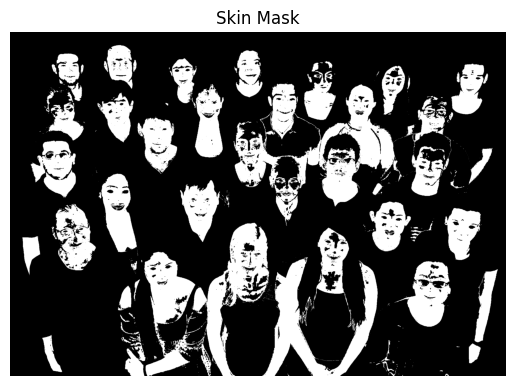

In [239]:
plt.imshow(mask, cmap='gray')
plt.title("Skin Mask")
plt.axis("off")
plt.show()

First I'll converts the entire image to grayscale, and I'll stack the grayscale image across 3 channels so it can replace RGB pixels directly later. The main reason I'm doing this is because I don't want to just assign the same gray to every face. Like darker skin tones should be darker gray, and lighter skin tones should be lighter gray.

In [240]:
gray_img = color.rgb2gray(image)
gray_img_3ch = np.stack([gray_img] * 3, axis=-1)

img_as_ubyte converts the grayscale image to uint8, matching the original image’s data type and scale The boolean mask is then used to selectively replace only the skin pixels with the corresponding grayscale values, and everything else remains untouched.

In [241]:
output_img = image.copy()
output_img[mask] = img_as_ubyte(gray_img_3ch)[mask]

Now lets compare to see how we did.

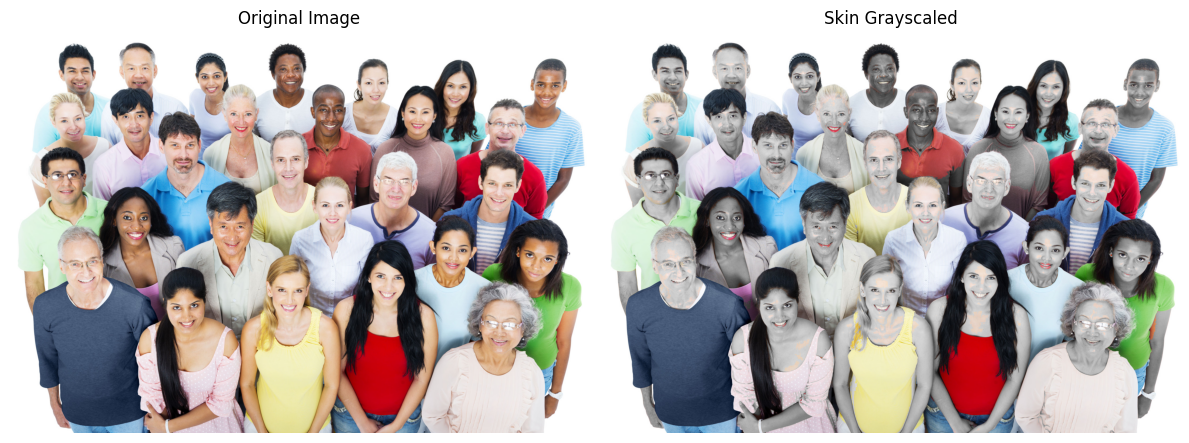

In [242]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title('Skin Grayscaled')
plt.axis('off')
plt.tight_layout()
plt.show()

AFTER A LOT OF TWEAKING! It's pretty close :)

Full function:

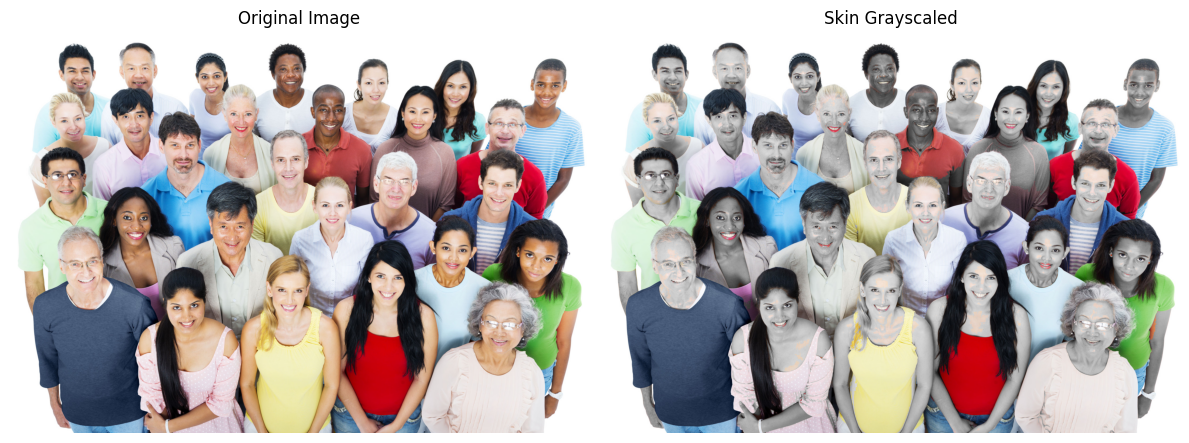

In [243]:
def skintogray(path):
    image = io.imread(path)

    ycbcr_img = color.rgb2ycbcr(image)
    
    cb_min = 80
    cb_max = 135
    cr_min = 140
    cr_max = 165

    cb = ycbcr_img[:, :, 1]
    cr = ycbcr_img[:, :, 2] 

    mask = (cb >= cb_min) & (cb <= cb_max) & (cr >= cr_min) & (cr <= cr_max)

    gray_img = color.rgb2gray(image)
    gray_img_3ch = np.stack([gray_img] * 3, axis=-1)

    output_img = image.copy()
    output_img[mask] = img_as_ubyte(gray_img_3ch)[mask]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(output_img)
    plt.title('Skin Grayscaled')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

skintogray('Group-of-people.jpg')